In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#Read the data
data = pd.read_csv('data/zomato_df_final_data.csv')
data.head()
print(len(data))
print(data.columns)

10500
Index(['address', 'cost', 'cuisine', 'lat', 'link', 'lng', 'phone',
       'rating_number', 'rating_text', 'subzone', 'title', 'type', 'votes',
       'groupon', 'color', 'cost_2', 'cuisine_color'],
      dtype='object')


In [3]:
# summary of dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1

In [4]:
# check cardinality (number of unique labels) of cuisine
var = 'cuisine'
us = data[var].unique()
print(var, ' contains ', len(us), ' labels.')
print(f'The number of unique cuisines served by Sydney restaurants is: {len(us)}')


cuisine  contains  1759  labels.
The number of unique cuisines served by Sydney restaurants is: 1759


In [5]:
import ast

# I think if two restaurants serve ['Japanese', 'Sushi'] and ['Japanese', 'Ramen'], num of unique cuisines should be 3 rather than 2.
cuisine_list = []
for str_list in data[var]:
    cuisine_list_row = ast.literal_eval(str_list)
    cuisine_list.extend(cuisine_list_row)
print(f'The number of unique cuisines served by Sydney restaurants is: {len(set(cuisine_list))}')


The number of unique cuisines served by Sydney restaurants is: 134


#which suburbs (top-3) have the highest number of restaurants?

In [6]:
#which suburbs (top-3) have the highest number of restaurants?
#Use the 'value_counts()' function counts the occurrence of each unique value in the 'subzone' column.
suburb_counts = data['subzone'].value_counts()

# Using the 'head()' function on our counted values gives us the top results.
top_3_suburbs = suburb_counts.head(3)

#Display the results
print('The top-3 suburbs are:')
for suburb, count in top_3_suburbs.items():
    print(f"{suburb}: {count} restaurants")


The top-3 suburbs are:
CBD: 476 restaurants
Surry Hills: 260 restaurants
Parramatta: 225 restaurants


#Restaurants with ‘excellent’ rating are mostly very expensive while those with
‘Poor’ rating are rarely expensive”. Do you agree on this statement or not? Please
support your answer by numbers and visuals. (hint: use stacked bar chart or
histogram to relate ‘cost’ to 'rating_text')

/var/folders/ys/rjxnp6691vx91dcgkz345r1w0000gn/T/ipykernel_27796/381420140.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = filtered_data.groupby(['rating_text', pd.cut(filtered_data['cost'], bins=cost_bins)]).size().unstack()


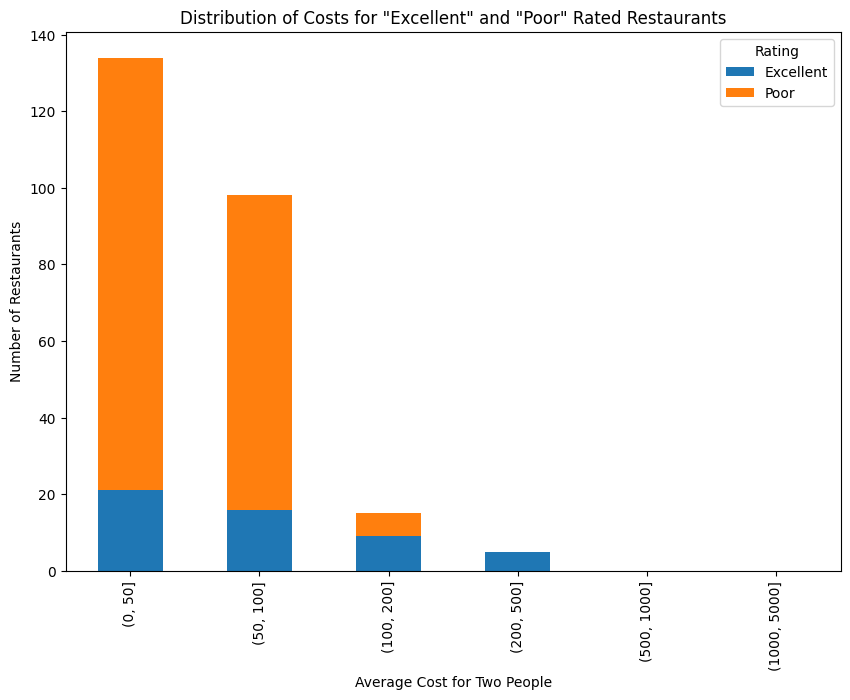

In [7]:
# Filter out only restaurants with 'excellent' or 'poor' ratings
filtered_data = data[data['rating_text'].isin(['Excellent', 'Poor'])]

#Group data by 'rating_text' and create bins for 'cost' 
cost_bins = [0, 50, 100, 200, 500, 1000, 5000]  
grouped = filtered_data.groupby(['rating_text', pd.cut(filtered_data['cost'], bins=cost_bins)]).size().unstack()

# Plot
grouped.transpose().plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Distribution of Costs for "Excellent" and "Poor" Rated Restaurants')
plt.xlabel('Average Cost for Two People')
plt.ylabel('Number of Restaurants')
plt.legend(title='Rating')
plt.show()

Based on the visualization, the "Excellent" category has higher bars in the more expensive bins, it indicates that restaurants rated as "Excellent" tend to be more expensive than others. This would indeed support the initial claim that “Restaurants with ‘excellent’ rating are mostly very expensive.

From your visulisation, there're nearly 38/45 'excellent' restaurants cost less than 100.   
"those with ‘Poor’ rating are rarely expensive" is kind of true.  
I'm not sure.

#Perform exploratory analysis for the variables of the data.

In [8]:
# check if the target variable has any na/null values
print(data.shape)
data = data[data['cost'].notna()]
print(data.shape)

(10500, 17)
(10154, 17)


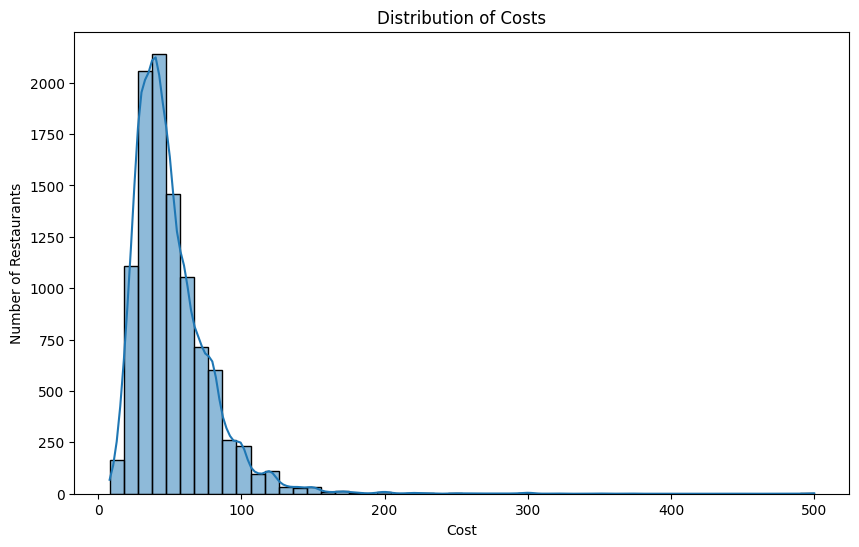

count    10154.000000
mean        51.153240
std         27.799485
min          8.000000
25%         30.000000
50%         45.000000
75%         60.000000
max        500.000000
Name: cost, dtype: float64


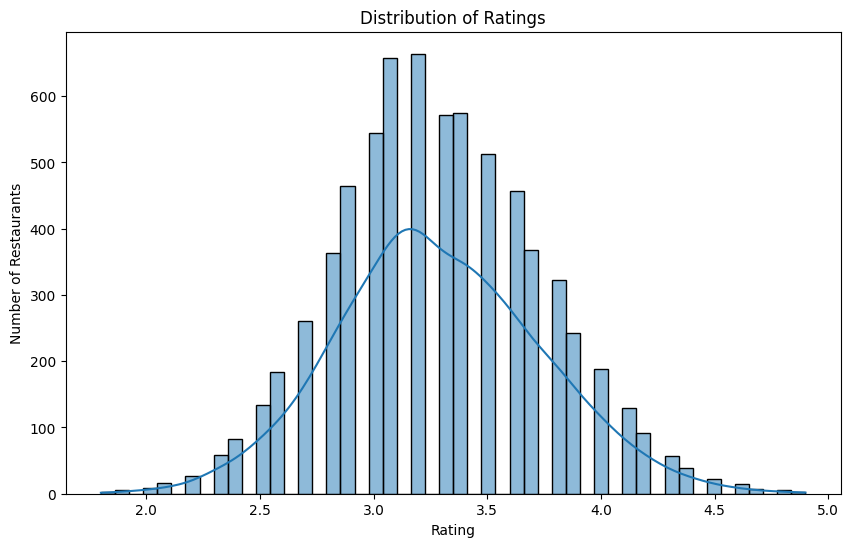

count    7081.000000
mean        3.287276
std         0.454703
min         1.800000
25%         3.000000
50%         3.300000
75%         3.600000
max         4.900000
Name: rating_number, dtype: float64


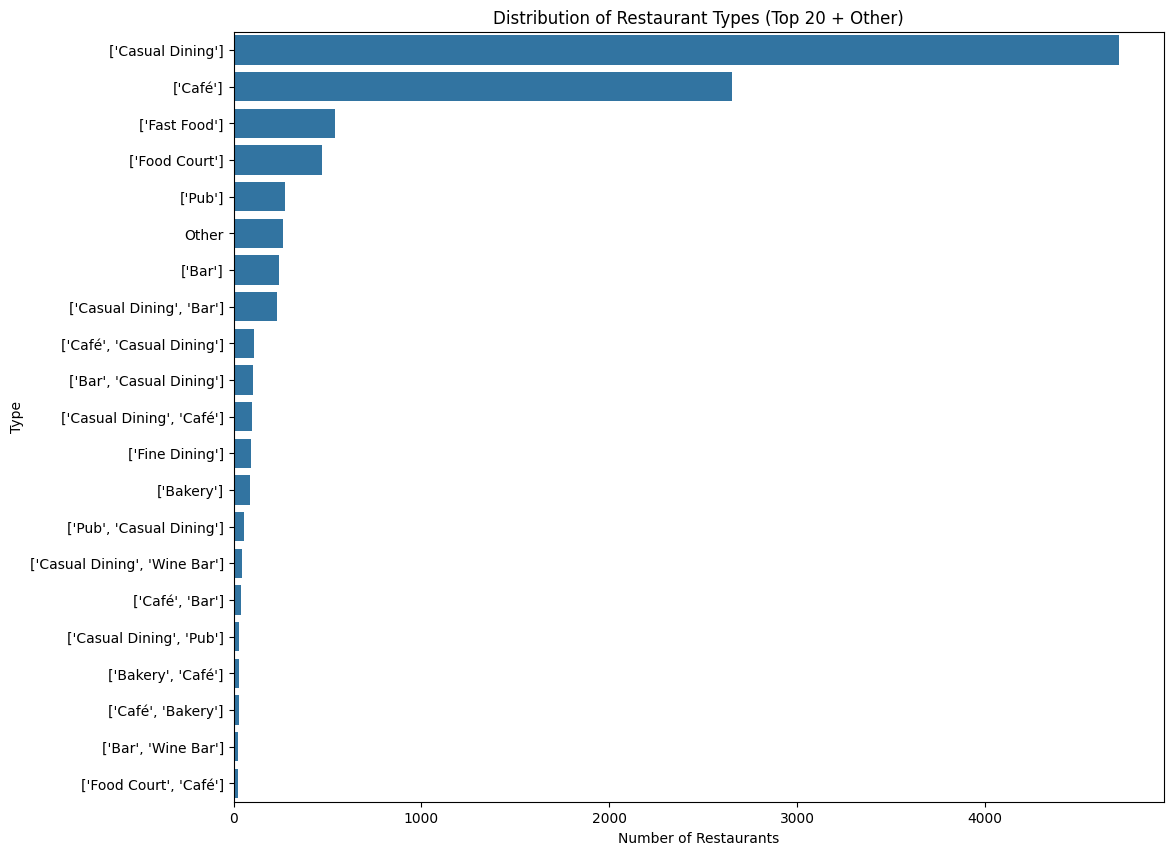

In [11]:
# Plot the distribution of the 'cost' column
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='cost', bins=50, kde=True)  # kde shows the density curve
plt.title('Distribution of Costs')
plt.xlabel('Cost')
plt.ylabel('Number of Restaurants')
plt.show()

# Print basic descriptive statistics for the 'cost' column (mean, median, std deviation, etc.)
cost_describe = data['cost'].describe()
print(cost_describe)

# ---- Rating Analysis ----

# Plot the distribution of the 'rating_number' column
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='rating_number', bins=50, kde=True)  # Assuming 'rating_number' is the column for numeric ratings
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.show()

# Print basic descriptive statistics for the 'rating_number' column
rating_describe = data['rating_number'].describe()
print(rating_describe)

# ---- Type Analysis ----

# Aggregate the data
top_n = 20
top_types = data['type'].value_counts().iloc[:top_n].index.tolist()
data['type_simplified'] = data['type'].apply(lambda x: x if x in top_types else 'Other')

# Create a bar plot for the 'type_simplified' column
plt.figure(figsize=(12, 10))
sns.countplot(data=data, y='type_simplified', order=data['type_simplified'].value_counts().index)  # Order the bars by frequency
plt.title('Distribution of Restaurant Types (Top 20 + Other)')
plt.xlabel('Number of Restaurants')
plt.ylabel('Type')
plt.show()




#Produce Cuisine Density Map

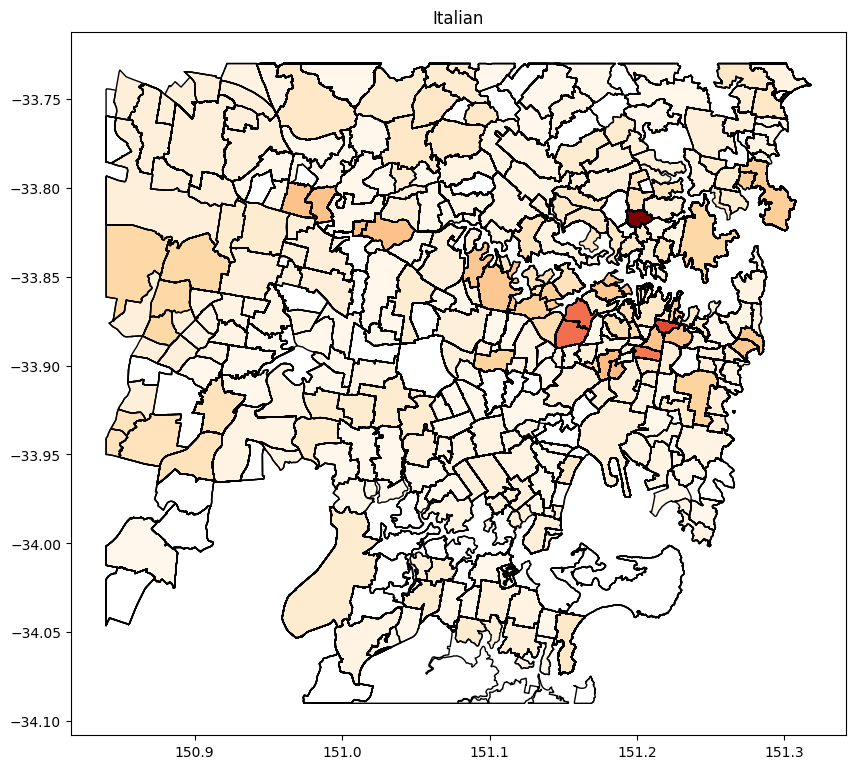

In [13]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

def show_cuisine_densitymap(cuisine='Indian'):

    geojson_path = "data/sydney.geojson"
    sydney_gdf = gpd.read_file(geojson_path)

    restaurant_data_path = "data/zomato_df_final_data.csv"
    restaurant_df = pd.read_csv(restaurant_data_path)

    missing = restaurant_df['lat'].isnull() | restaurant_df['lng'].isnull()
    restaurant_df = restaurant_df[~missing]
    geometry = [Point(xy) for xy in zip(restaurant_df['lng'], restaurant_df['lat'])]
    restaurant_gdf = gpd.GeoDataFrame(restaurant_df, geometry=geometry)
    restaurant_gdf.set_crs(epsg=4326, inplace=True)

    sydney_with_restaurants = gpd.sjoin(sydney_gdf, restaurant_gdf, predicate='intersects')
    filtered_gdf = sydney_with_restaurants[sydney_with_restaurants['cuisine'].apply(lambda x: cuisine in x)]
    suburb_counts = filtered_gdf.groupby('subzone').size().reset_index(name='Restaurant_Count')
    suburb_gdf = sydney_with_restaurants.merge(suburb_counts, on='subzone', how='left')

    fig, ax = plt.subplots(figsize=(10, 10))
    suburb_gdf.boundary.plot(ax=ax, linewidth=1, color='black')
    suburb_gdf.plot(column='Restaurant_Count', cmap='OrRd', ax=ax, legend=False)
    plt.title(cuisine)
    plt.show()


show_cuisine_densitymap('Italian')

Part B-Predictive Modelling

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [15]:
# categrical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print("There are {} categorical variables\n".format(len(categorical)))
print("The categorical variables are: ", categorical)

There are 11 categorical variables

The categorical variables are:  ['address', 'cuisine', 'link', 'phone', 'rating_text', 'subzone', 'title', 'type', 'color', 'cuisine_color', 'type_simplified']


In [16]:
# find numerical variables
numericals = [var for var in data.columns if data[var].dtype != 'O']
print('There are {} numerical variables\n'.format(len(numericals)))
print('The numerical variables are :', numericals)

There are 7 numerical variables

The numerical variables are : ['cost', 'lat', 'lng', 'rating_number', 'votes', 'groupon', 'cost_2']


In [17]:
# Fill missing values in numerical variables with the mean
numerical_vars = ['cost', 'lat', 'lng', 'rating_number', 'votes', 'groupon', 'cost_2']
data[numerical_vars] = data[numerical_vars].fillna(data[numerical_vars].mean())

# Fill missing values in categorical variables with the mode
categorical_vars = ['cuisine', 'rating_text', 'type', 'color', 'cuisine_color']
for var in categorical_vars:
    mode_value = data[var].mode()[0]
    data[var].fillna(mode_value, inplace=True)
columns_to_drop = ['address', 'phone', 'link', 'title','cuisine']

# Drop columns that are not needed
data.drop(columns=columns_to_drop, inplace=True)

# Print information about the cleaned data
print(data.info())

# Check for any remaining missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 10154 entries, 0 to 10499
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cost             10154 non-null  float64
 1   lat              10154 non-null  float64
 2   lng              10154 non-null  float64
 3   rating_number    10154 non-null  float64
 4   rating_text      10154 non-null  object 
 5   subzone          10154 non-null  object 
 6   type             10154 non-null  object 
 7   votes            10154 non-null  float64
 8   groupon          10154 non-null  bool   
 9   color            10154 non-null  object 
 10  cost_2           10154 non-null  float64
 11  cuisine_color    10154 non-null  object 
 12  type_simplified  10154 non-null  object 
dtypes: bool(1), float64(6), object(6)
memory usage: 1.0+ MB
None


/var/folders/ys/rjxnp6691vx91dcgkz345r1w0000gn/T/ipykernel_27796/89600160.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[var].fillna(mode_value, inplace=True)


cost               0
lat                0
lng                0
rating_number      0
rating_text        0
subzone            0
type               0
votes              0
groupon            0
color              0
cost_2             0
cuisine_color      0
type_simplified    0
dtype: int64

In [18]:
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
# data['cuisine'] = label_encoder.fit_transform(data['cuisine'].apply(lambda x: ', '.join(x)))
data['subzone'] = label_encoder.fit_transform(data['subzone'])
data['rating_text'] = label_encoder.fit_transform(data['rating_text'])
data['type'] = label_encoder.fit_transform(data['type'])
data['color'] = label_encoder.fit_transform(data['color'])
data['cuisine_color'] = label_encoder.fit_transform(data['cuisine_color'])
data['type_simplified'] = label_encoder.fit_transform(data['type_simplified'])


        cost        lat         lng  rating_number  rating_text  subzone  \
0       50.0 -33.876059  151.207605       4.000000            4       60   
1       80.0 -33.910999  151.193793       4.600000            1      489   
2      120.0 -33.867971  151.195210       4.900000            1      506   
3      270.0 -33.856784  151.215297       4.900000            1      104   
4       55.0 -33.879035  151.206409       4.500000            1       99   
...      ...        ...         ...            ...          ...      ...   
10495   40.0 -33.808653  150.972147       3.287276            0      366   
10496   20.0 -33.922147  151.078400       3.287276            0      245   
10497   20.0 -33.726993  150.725143       3.287276            0      372   
10498   15.0 -33.766770  150.769962       3.287276            0      446   
10499   60.0 -32.889576  147.965633       3.287276            0      339   

       type        votes  groupon  color     cost_2  cuisine_color  \
0        34  1311

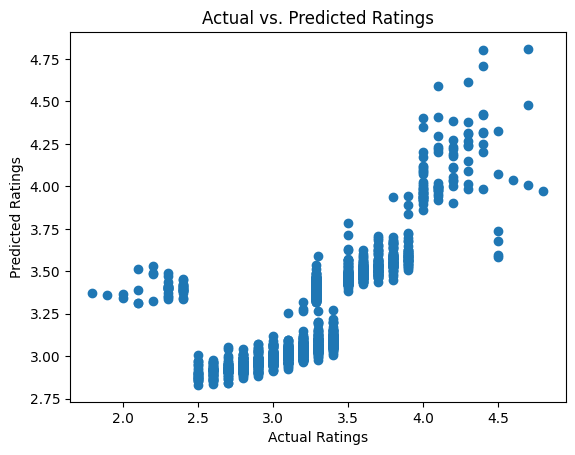

In [19]:
# Split the data into features (x) and target variable (y)
print(data)
y = data['rating_number']
x = data.drop(columns=['rating_number'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the MSE
print(f'Mean Squared Error (MSE): {mse}')

# Visualize the model's predictions and residuals
# Create a scatter plot to visualize the relationship between actual ratings and predicted ratings
plt.scatter(y_test, y_pred)
# Set the x-axis label to 'Actual Ratings'
plt.xlabel('Actual Ratings')
# Set the y-axis label to 'Predicted Ratings'
plt.ylabel('Predicted Ratings')
# Set the plot title to 'Actual vs. Predicted Ratings'
plt.title('Actual vs. Predicted Ratings')
# Show the plot
plt.show()



Mean Squared Error (MSE) of model_regression_2: 0.06044874172735825


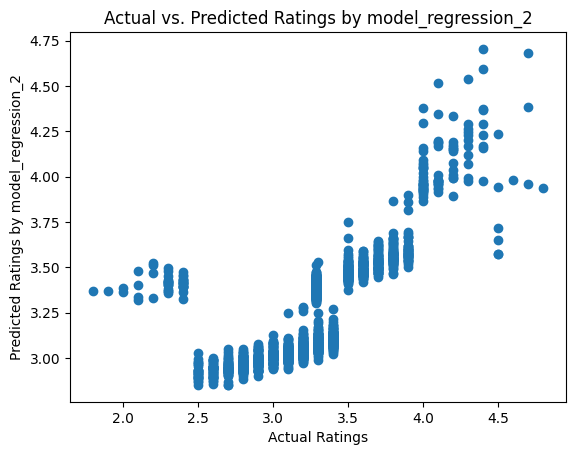

In [20]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming your data preprocessing is already done above

# Standardize the features since SGD is sensitive to feature scaling
# Using a pipeline makes this easy to manage
pipeline = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))

# Train the model
pipeline.fit(x_train, y_train)

# Make predictions on the test set
y_pred_2 = pipeline.predict(x_test)

# Calculate the Mean Squared Error (MSE) for model_regression_2
mse_2 = mean_squared_error(y_test, y_pred_2)

# Print the MSE
print(f'Mean Squared Error (MSE) of model_regression_2: {mse_2}')

# Visualize the model's predictions and residuals
# Create a scatter plot to visualize the relationship between actual ratings and predicted ratings
plt.scatter(y_test, y_pred_2)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings by model_regression_2')
plt.title('Actual vs. Predicted Ratings by model_regression_2')
plt.show()



Classification:


In [21]:
df = pd.read_csv('data/zomato_df_final_data.csv')



# Fill missing values in numerical variables with the mean
numerical_vars = ['cost', 'lat', 'lng', 'rating_number', 'votes', 'groupon', 'cost_2']
df[numerical_vars] = df[numerical_vars].fillna(df[numerical_vars].mean())

# Fill missing values in categorical variables with the mode
categorical_vars = ['cuisine', 'rating_text', 'type', 'color', 'cuisine_color']
for var in categorical_vars:
    mode_value = df[var].mode()[0]
    df[var].fillna(mode_value, inplace=True)
columns_to_drop = ['address', 'phone', 'link', 'title','cuisine']

# Drop columns that are not needed
df.drop(columns=columns_to_drop, inplace=True)

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
# data['cuisine'] = label_encoder.fit_transform(data['cuisine'].apply(lambda x: ', '.join(x)))
df['subzone'] = label_encoder.fit_transform(df['subzone'])
# df['rating_text'] = label_encoder.fit_transform(df['rating_text'])
df['type'] = label_encoder.fit_transform(df['type'])
df['color'] = label_encoder.fit_transform(df['color'])
df['cuisine_color'] = label_encoder.fit_transform(df['cuisine_color'])

/var/folders/ys/rjxnp6691vx91dcgkz345r1w0000gn/T/ipykernel_27796/2979628686.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[var].fillna(mode_value, inplace=True)


In [22]:
# Define a mapping from the original categories to the binary classification
binary_mapping = {
    'Poor': 1,
    'Average': 1,
    'Good': 2,
    'Very Good': 2,
    'Excellent': 2
}
# Apply the mapping to the rating_text column
df['rating_text'] = df['rating_text'].map(binary_mapping)

df['rating_text'].tolist()



[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [23]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print(non_numeric_columns)


Index([], dtype='object')


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the features and target variable
X = df.drop(columns=['rating_text'])  # Assuming you want to exclude 'rating_text'
y = df['rating_text']
# print(X.head())
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the logistic regression model
model_classification_3 = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
model_classification_3.fit(X_train, y_train)

# Predict on the test set
y_pred = model_classification_3.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy of the logistic regression model: {accuracy:.2%}")

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy of the logistic regression model: 99.67%
Confusion Matrix:
[[1624    7]
 [   0  469]]


/Users/daibo/Documents/penwell_workspace/code_from_course/code_from_course/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
